# Handwritten Digit Recognition using CNN (MNIST)

## Problem Statement
The objective of this project is to classify handwritten digits (0–9) using a Convolutional Neural Network.

## Dataset
The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits, each of size 28×28 pixels.

## Approach
The images are normalized and reshaped before training a CNN model to learn spatial features and classify digits accurately.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

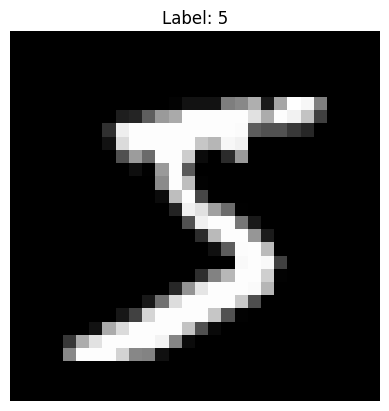

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
print("After reshape:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


After reshape:
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9048 - loss: 0.3128 - val_accuracy: 0.9863 - val_loss: 0.0485
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9903 - val_loss: 0.0362
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9913 - val_loss: 0.0355
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9908 - val_loss: 0.0357


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9872 - loss: 0.0489
Test Accuracy: 0.9904999732971191


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted digit: 7
Actual digit: 7


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

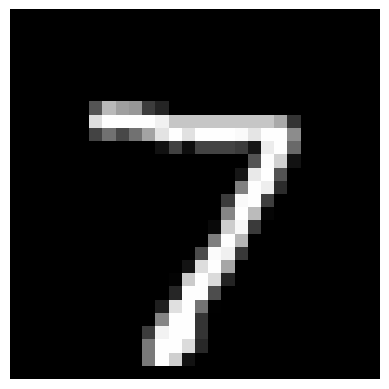

In [14]:
import numpy as np

prediction = model.predict(X_test[:1])
print("Predicted digit:", np.argmax(prediction))
print("Actual digit:", y_test[0])

plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.axis('off')


## Conclusion

In this project, a Convolutional Neural Network (CNN) was developed to classify handwritten digits using the MNIST dataset. The images were preprocessed through normalization and reshaping before training the model. The CNN was able to learn meaningful spatial features and achieved a test accuracy of 99%. The results demonstrate the effectiveness of CNNs in image classification tasks and highlight their suitability for computer vision applications.
